<h1>Gradient Descent</h1>

<h2>Optimization, Problem Description</h2>

Suppose we have a cost function $ J(\theta) $ and we want to find $ \theta $ which minimize the function

In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np

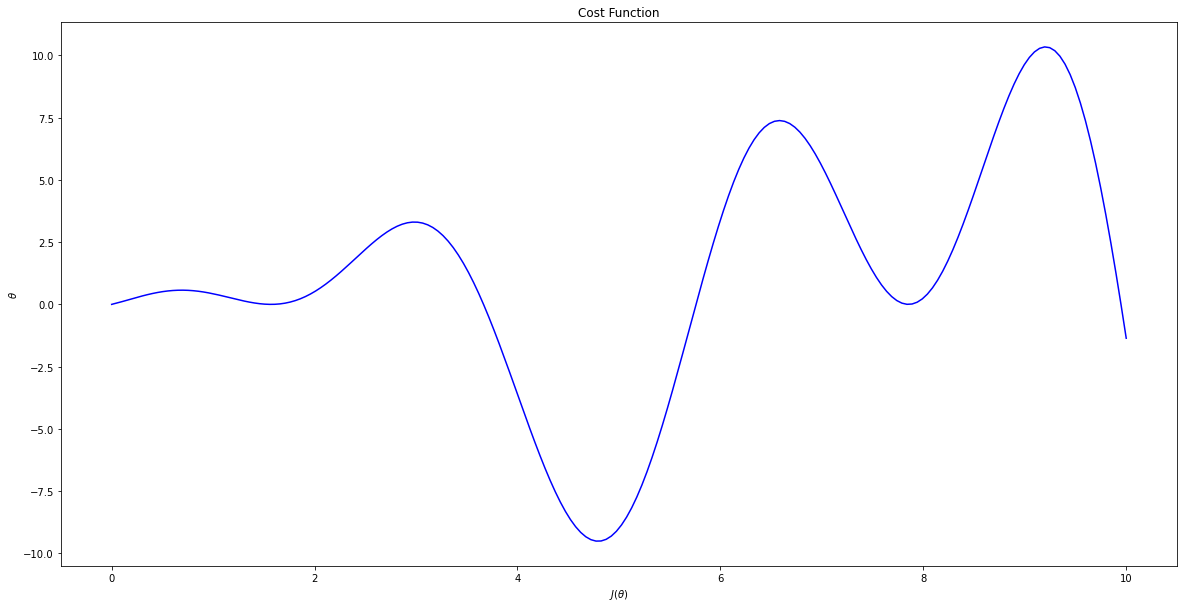

In [2]:
plt.figure(figsize=(20,10))
plt.title("Cost Function")
plt.xlabel(r"$J( \theta )$")
plt.ylabel(r"$\theta$")
x_plot = np.linspace(0, 10, 200)
y_plot = x_plot * np.sin(x_plot) + x_plot * np.cos(2 * x_plot)
plt.plot(x_plot, y_plot, color="b")
plt.show()

<p>In analytical approaches we should take derivative (gradient) of the cost function and find the roots of the derivitive functions. However for most of the functions this approach is not practical since finding the roots analytically is not possible</p>

$$
J(\theta) = \theta \sin(\theta) + \theta \cos(2\theta) \\
J^{\prime}(\theta)= \sin(\theta) + \theta\cos(\theta) + \cos(2\theta) - 2\theta\sin(2\theta) \\
J^{\prime}(\theta)= 0 \rightarrow \sin(\theta) + \theta\cos(\theta) + \cos(2\theta) - 2\theta\sin(2\theta) = 0
$$

<p>For optimizing these functions there are <b>Iterative(Numerical) Algorithms</b> in which we start with an <b>initial guess</b> and in an iterative manner we improve this guess to reach the minimum<p>

<p> <b>Gradient Descent</b> is one of the most famous optimization algorithm which is very practical in Machine Learning and Deep Learning</p>

<h2> Gradient Descent Steps</h2>

<h4>Let suppose we want to find the minimum point of this function:</h4>

<img src="images/gradient_descent_1.png" alt="Gradinet Descent" width="500" height="500">

<h4> Step 1: Start with an initial guess $x_0$ (it can be random but there are wiser choices)
</h4>

<img src="images/gradient_descent_2.png" alt="Gradinet Descent" width="500" height="500">

<h4>Step 2: Compute the gradient of the function at this point</h4>
$$
J^{\prime}(x_0)
$$

<img src="images/gradient_descent_3.png" alt="Gradinet Descent" width="500" height="500">

<h4>Take a step in the opposite direction of the gradient</h4>
$$
x_1 = x_0 - lr \times J^{\prime}(x_0)
$$

<img src="images/gradient_descent_4.png" alt="Gradinet Descent" width="500" height="500">

<img src="images/gradient_descent_5.png" alt="Gradinet Descent" width="500" height="500">

<h4> Iterate untill convergence </h4>

<img src="images/gradient_descent_6.png" alt="Gradinet Descent" width="500" height="500">

<img src="images/gradient_descent_7.png" alt="Gradinet Descent" width="500" height="500">

<img src="images/gradient_descent_8.png" alt="Gradinet Descent" width="500" height="500">

<img src="images/gradient_descent_9.png" alt="Gradinet Descent" width="500" height="500">

<h2>Implementation of Gradient Descent for a one dimensional function</h2>

<h3> Find the minimum of the following function with gradient descent algorithm</h3>

$$
J(\theta) = \theta \sin(\theta) + \theta \cos(2\theta) \\
$$

In [3]:
def J(x):
    y = x * np.sin(x) + x * np.cos(2 * x)
    return y

In [4]:
def j_deriv(x):
    y_deriv = np.sin(x) + x * np.cos(x) + np.cos(2 * x) - 2 * x * np.sin(2 * x)
    return y_deriv

In [5]:
x_prev = 1
lr = 0.01
while True:
    grad = j_deriv(x_prev)
    x_next = x_prev - lr * grad
    if np.abs(J(x_prev) - J(x_next)) < 10e-10:
        print("Converged to {}".format(x_next))
        break
    x_prev = x_next

Converged to 1.5707328225287367


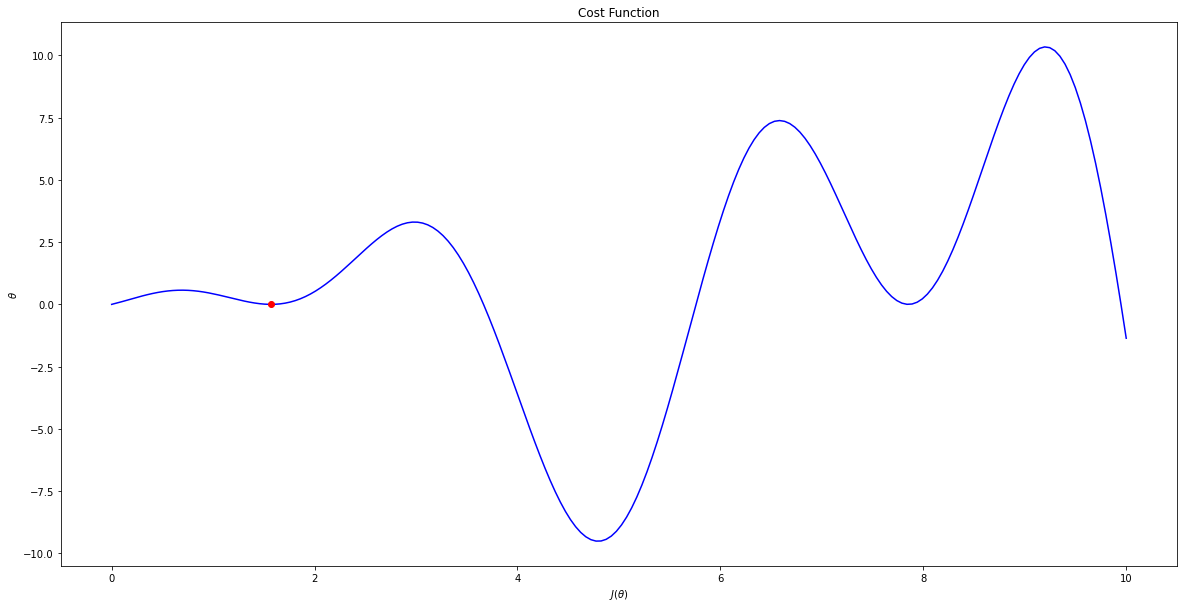

In [6]:
plt.figure(figsize=(20,10))
plt.title("Cost Function")
plt.xlabel(r"$J( \theta )$")
plt.ylabel(r"$\theta$")
x_plot = np.linspace(0, 10, 200)
y_plot = x_plot * np.sin(x_plot) + x_plot * np.cos(2 * x_plot)
x_opt = x_next
y_opt = J(x_next)
plt.plot(x_plot, y_plot, color="b")
plt.plot(x_opt, y_opt, "ro")
plt.show()

<h2>Notes</h2>

1. Gradient descent algorithm is sensitive to initial points and may find different solutions for different choices of initial point.
2. Gradient descent finds **local minimum** not **global minimum**, So choosing initial points wisely is very important.
3. choosing good learning rate is very important, since small learning rate may cause **slow convergence** and large learning rate may cause algorithm to stuck and fails.

<h2> Gradient Descent for multi-dimensional functions</h2>

<p>Suppose we want to find the minimum of this function:</p>

<img src="images/multivariable_gradient_descent.png" alt="Gradinet Descent" width="500" height="500">

<img src="images/level_sets.png" alt="Gradinet Descent" width="500" height="500">

<h3>Gradient descent formula</h3>

$$
\vec{x_n} = \vec{x_{n-1}} - lr \times \vec{\nabla J_{x_{n-1}}}
$$

<h2>Gradient Descent for Linear Regression</h2>

<p>Recall from last session that the linear regression problem had the MSE loss function:</p>

$$
MSE = \frac{1}{N}\sum_{i=1}^{N} ((a_1x_1^{(i)} + a_2x_2^{(i)} + ... + a_nx_n^{(i)} + a_{n+1}) - y_{true}^{(i)})^2
$$

To apply gradient descent we should compute the gradient of this function

$$
\frac{\partial{J}}{\partial{a_j}} = \frac{2}{N} \sum_{i=1}^{N} x_j^{(i)} ((a_1x_1^{(i)} + a_2x_2^{(i)} + ... + a_nx_n^{(i)} + a_{n+1}) - y_{true}^{(i)})
$$

$$
\frac{\partial{J}}{\partial{a_{n+1}}} = \frac{2}{N} \sum_{i=1}^{N} ((a_1x_1^{(i)} + a_2x_2^{(i)} + ... + a_nx_n^{(i)} + a_{n+1}) - y_{true}^{(i)})
$$

In [7]:
import pandas as pd
import numpy as np

In [8]:
dataset_df = pd.read_csv("house_dataset.csv")
dataset_df.head(10)

,area,balcony,price
0,106,13,2892
1,51,27,932
2,108,8,3030
3,108,34,2711
4,141,0,3993
5,85,0,2438
6,40,0,246
7,49,13,710
8,32,6,1294
9,112,0,1986


In [9]:
features = dataset_df[["area", "balcony"]].values
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
features = np.c_[features, np.ones((features.shape[0]))]

In [10]:
price = dataset_df[["price"]].values

In [11]:
def compute_mse(params, features, price):
    y_preds = features @ params
    mse = np.mean((y_preds - price) ** 2)
    return mse

In [12]:
def compute_grads(params, features, price):
    grads = []
    y_preds = features @ params
    for i, param in enumerate(params):
        mult = np.multiply(np.expand_dims(features[:, i], -1), (y_preds - price))
        grads.append(2 * np.mean(mult))
    grads = np.expand_dims(np.array(grads), axis=-1)
    return grads

In [13]:
params_prev = 5 * np.ones(shape=(3, 1))
lr = 0.001


In [14]:
while True:
    grad = compute_grads(params_prev, features, price)
    params_next = params_prev - lr * grad
    if np.abs(compute_mse(params_prev, features, price) - compute_mse(params_next, features, price)) < 10e-10:
        print("Converged to {}".format(params_next))
        break
    params_prev = params_next

Converged to [[ 869.19427889]
 [ 168.79935344]
 [2345.86953205]]


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(features[:,:-1],price)

LinearRegression()

In [16]:
model.coef_

array([[869.19448573, 168.79923506]])

In [17]:
model.intercept_

array([2345.87])